# Visualizing Results
Below we load each model from the last checkpoint and then visualize prediction results.

In [1]:
import os
from pathlib import Path

import yaml
from pytorch_lightning.strategies import DDPStrategy

from lfp_prediction.models import nn_models
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.utilities.seed import seed_everything
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint
from lfp_prediction.data_gathering.dataset import LFPDataset

config_file = 'configs/vae.yml'
chkpt_file = 'logs/BetaVAE_InVivoRaw/version_1/checkpoints/epoch=19-step=54360.ckpt'

with open(config_file, 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

        
# For reproducibility
seed_everything(config['exp_params']['manual_seed'], True)

model = nn_models[config['model_params']['name']].load_from_checkpoint(chkpt_file, params=config['model_params'])
data = LFPDataset(**config["data_params"], pin_memory=config['trainer_params']['gpus'] != 0)
data.setup()
test_input, test_label = next(iter(data.test_dataloader()))

model.eval()
y_hat = model(test_input)[0]
print(y_hat.shape, test_label.shape)

Global seed set to 1111


torch.Size([16, 1, 256]) torch.Size([16, 1, 256])


In [2]:
train_input, train_label = next(iter(data.train_dataloader()))

model.eval()
y_hat_t = model(train_input)[0]
print(y_hat_t.shape, train_label.shape)

torch.Size([16, 1, 256]) torch.Size([16, 1, 256])


(16, 1, 256)


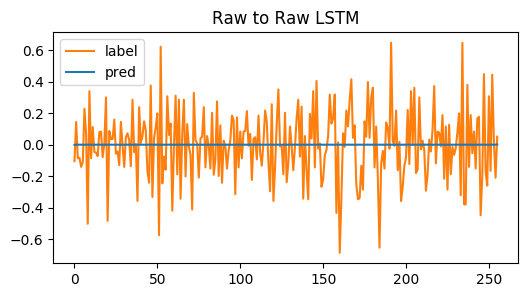

In [3]:
import matplotlib.pyplot as plt
import numpy as np

print(test_label.numpy().shape)

plt.figure(figsize=(6,3))
# plt.plot(np.arange(300), test_input.detach().cpu().numpy()[0,0,:], label='input')
plt.plot(np.arange(256), train_label.detach().cpu().numpy()[0,0,:], 'C1', label='label')
plt.plot(np.arange(256), y_hat_t.detach().cpu().numpy()[0,0,:], 'C0', label='pred')
plt.title('Raw to Raw LSTM')
plt.legend()
plt.show()

In [4]:
import matplotlib.pyplot as plt
import numpy as np

print(test_label.numpy().shape)

plt.figure(figsize=(10,5))
# plt.plot(np.arange(300), test_input.detach().cpu().numpy()[0,0,:], label='input')
plt.plot(np.arange(300), y_hat.detach().cpu().numpy()[0,0,:], label='pred')
plt.plot(np.arange(300), test_label.detach().cpu().numpy()[0,0,:], label='label')
plt.title('Raw to Raw VAE')
plt.legend()
plt.show()

(16, 1, 256)


ValueError: x and y must have same first dimension, but have shapes (300,) and (256,)